## Simulating 3D Microscopy and Photon Shot Noise in Python

The below introduction was written by ChatGPT after feeding it information about this example and asking it to generate a summary including cavaets.  A human has edited and read this answer over but please let us know if Chat made any mistakes which were not caught. 

The simulation saves a set of ground truths and inputs that can be used for testing deconvolution algorithms, or for training neural networks.  

In this Python notebook example, we will simulate a 3D microscopy imaging system and incorporate the photon shot noise, a fundamental noise source in imaging, into the simulated images.

The notebook will demonstrate the following steps:

Generation of a 3D image: We will populate a 3D array with randomly distributed spheres of varying sizes and positions to represent a complex 3D structure.

Point Spread Function (PSF) generation: We will calculate the PSF, which represents the blurring effect caused by the microscope's optical system. The PSF will be computed based on the microscope's parameters such as magnification, numerical aperture, and focal length.

Convolution with the PSF: The generated 3D image will be convolved with the PSF to simulate the blurring effect of the microscope on the true signal.

Photon shot noise addition: Photon shot noise arises due to the discrete nature of light and affects the number of photons detected by the camera. We will introduce photon shot noise into the convolved image to mimic this stochastic effect.

Cavaets: Please note that this example focuses on the generation of a 3D image, PSF calculation, convolution with the PSF, and addition of photon shot noise. Other aspects, such as optical aberrations, sample interactions, camera characteristics, sensor noise, and post-processing steps, are not considered in this simplified simulation. These additional factors can significantly impact the image quality and should be taken into account for comprehensive microscopy simulations.

## Import dependant libraries

... and define location to put ground truths and images

In [6]:
from tnia.simulation.phantoms import add_sphere3d
from tnia.plotting.projections import show_xy_zy_max, show_xy_zy_slice
from tnia.simulation.phantoms import add_small_to_large, sphere_fits
import numpy as np
import random
import raster_geometry as rg
from skimage.io import imsave
from tnia.deconvolution.forward import forward
import os


# path to put training data
truth_path = r'D:\images\deep-learning\simulation1\train\ground truth'
image_path = r'D:\images\deep-learning\simulation1\train\images'

if not os.path.exists(truth_path):
    os.makedirs(truth_path)
if not os.path.exists(image_path):
    os.makedirs(image_path)

## Create PSF used for simulation

sdeconv 1.x.x detected
0.9999998


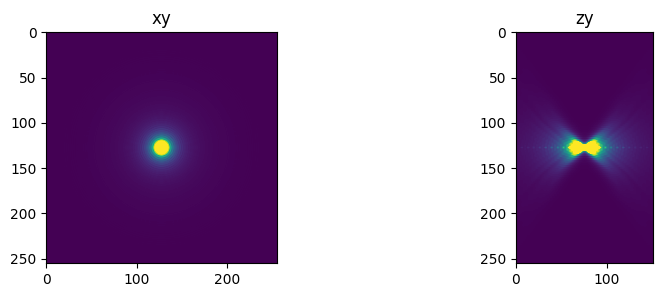

In [5]:
from tnia.deconvolution.psfs import gibson_lanni_3D

# scope parameters
ni=1.5
ns  = 1.33
NA=1.4
w=0.530

# apacings
xy_spacing = .1
z_spacing= .1

#depth to compute PSF this can be used to compute a PSF that has aberrations
#note stil need to confirm the sign of the depth, the negative sign is used to reproduce the experimental PSF
d=0

xy_psf_dim=255
z_psf_dim=151

psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_psf_dim, d, w)
psf = psf.astype('float32')

psf=psf/psf.sum()

fig=show_xy_zy_max(psf, vmax=psf.max()/100)
print(psf.sum())


## Create phantom and applying imaging system

In this block we create a set of phantoms, populate them with random spheres, apply the imaging model to them (convolution + Poisson noise), then save them.  

59 17 56
36 37 3
127 20 4
19 72 53
75 101 62
39 46 51
62 125 36
34 66 54
64 55 10
16 122 21
34 70 53
44 20 23
127 20 52
119 25 27
63 13 28
70 117 54
24 84 8
45 53 36
125 104 57
110 124 30
128 29 54
111 43 13
75 93 43
4 86 1
81 76 20
106 56 58
28 43 38
12 51 41
36 89 45
7 76 31
4 0 21
126 5 57
128 19 33
1 59 6
39 119 35
110 9 14
49 22 45
9 15 57
31 54 16
77 102 18
89 55 49
47 27 41
4 85 14
58 68 41
101 59 57
119 105 57
98 110 9
42 96 29
60 59 15
31 98 52
15 29 0
70 122 12
125 6 44
125 100 9
41 1 21
83 70 13
123 28 26
40 24 23
45 108 37
73 63 61
109 29 32
10 69 30
73 20 52
34 79 26
49 5 35
5 27 10
113 128 59
2 31 44
54 49 62
25 66 61
15 47 38
90 77 6
30 110 11
80 18 43
71 118 22
106 56 53
0 103 15
76 64 41
14 55 61
48 33 58
8 4 15
3 78 25
45 126 26
86 67 36
110 36 30
66 80 50
23 120 52
45 97 11
122 106 42
82 107 58
21 109 9
5 126 42
87 2 36
98 52 56
18 20 38
84 100 12
70 105 9
117 20 47
28 3 56
85 55 53
51 29 28
5 118 26
35 77 1
57 29 9
115 45 57
26 82 25
128 17 22
2 78 36
5 74 50
107 99

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\plotting\projections.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=figsize)


120 26 39
17 51 62
21 46 10
102 64 8
80 34 37
8 73 19
88 73 13
3 101 33
100 70 6
113 0 42
114 64 64
3 9 32
81 30 46
44 91 49
40 53 47
40 107 28
68 0 20
39 57 31
120 78 56
23 104 26
2 47 2
23 23 51
47 20 45
64 88 8
75 98 10
89 90 64
28 72 9
46 42 42
68 121 21
109 93 50
123 67 6
67 35 13
39 14 31
77 16 49
18 30 63
18 14 35
104 11 0
50 1 8
78 44 28
46 109 30
30 119 44
60 115 33
18 83 38
57 96 33
43 98 18
86 100 40
114 14 56
125 51 20
16 101 38
108 23 18
97 85 56
117 17 54
18 96 13
44 117 41
73 11 17
0 115 43
0 26 24
7 121 45
8 26 7
3 15 38
38 5 52
74 86 13
106 25 6
73 74 62
81 99 0
23 36 0
95 121 18
74 30 37
66 127 63
16 96 56
13 123 63
45 83 35
9 117 51
35 93 29
95 112 25
28 15 23
83 58 23
88 71 25
124 79 44
41 79 34
38 81 46
40 1 23
121 112 36
42 102 51
119 80 34
112 10 1
113 16 12
26 0 38
37 94 47
74 98 57
112 101 24
67 7 18
126 37 32
110 95 22
109 117 33
43 109 60
121 128 41
73 26 32
59 74 28
122 69 61
101 9 3
32 105 45
52 117 13
101 121 36
32 60 24
26 87 4
66 67 28
3 76 33
109 69 49


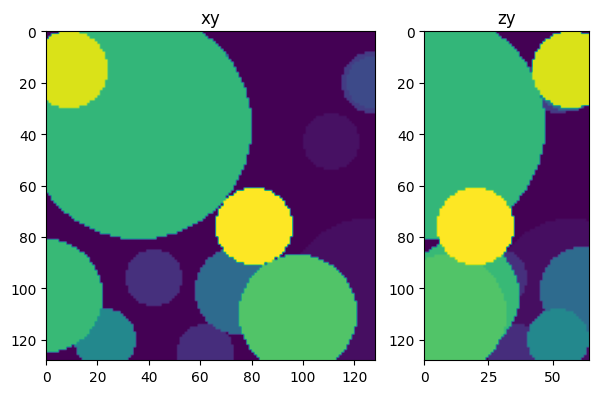

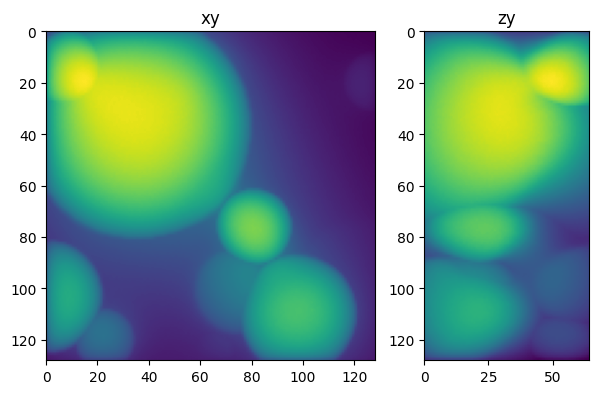

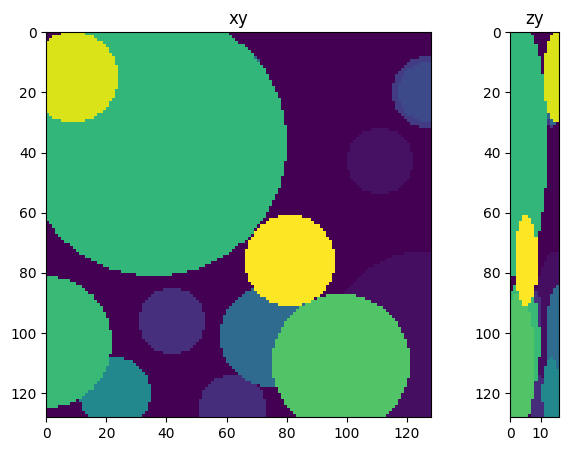

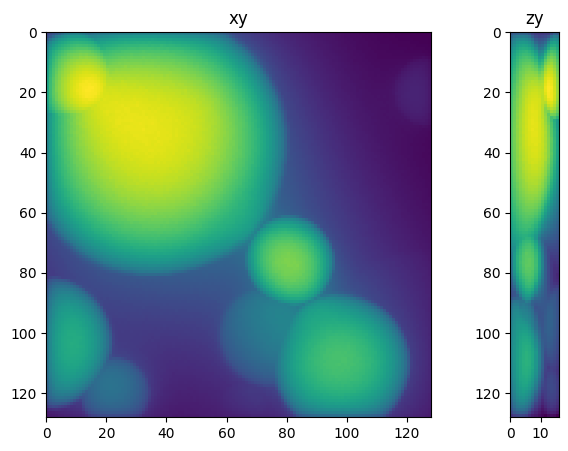

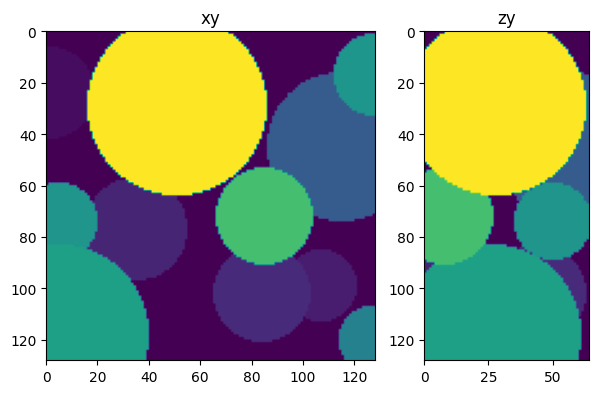

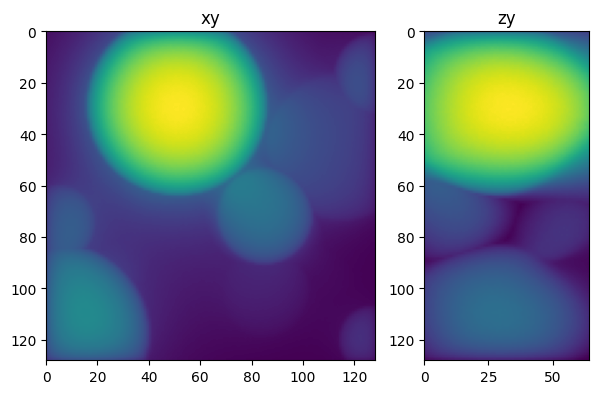

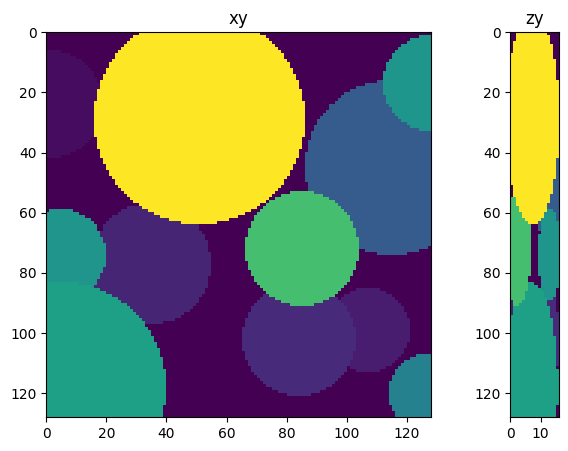

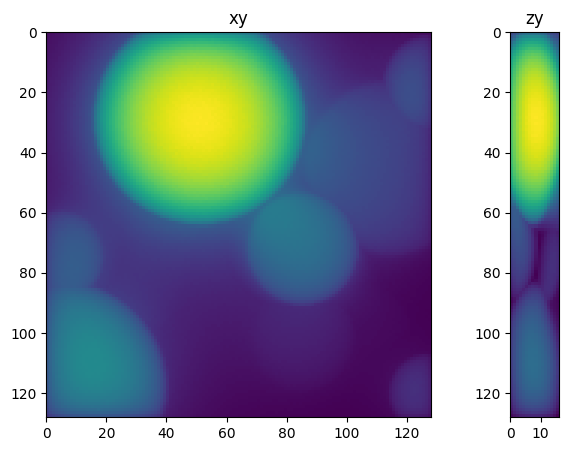

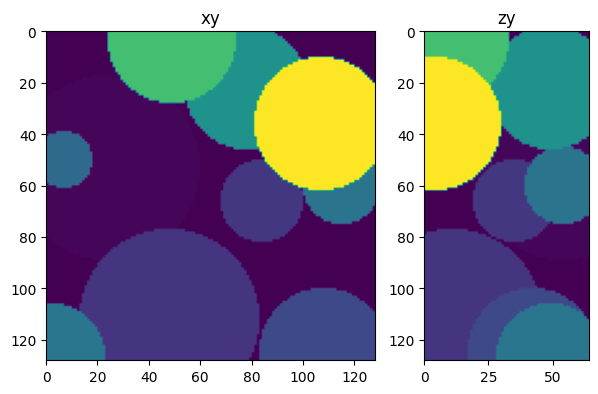

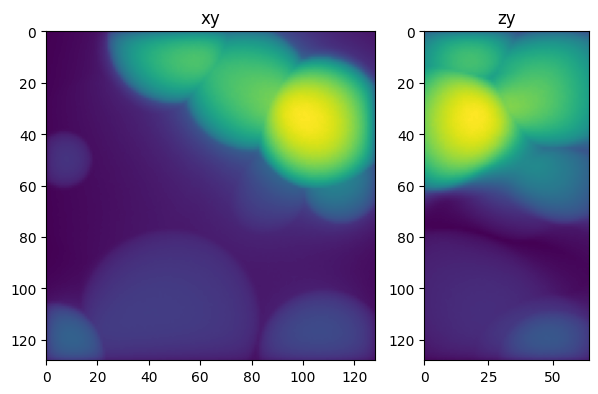

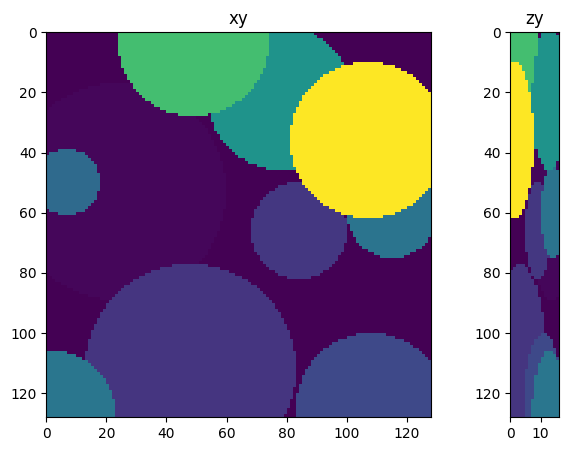

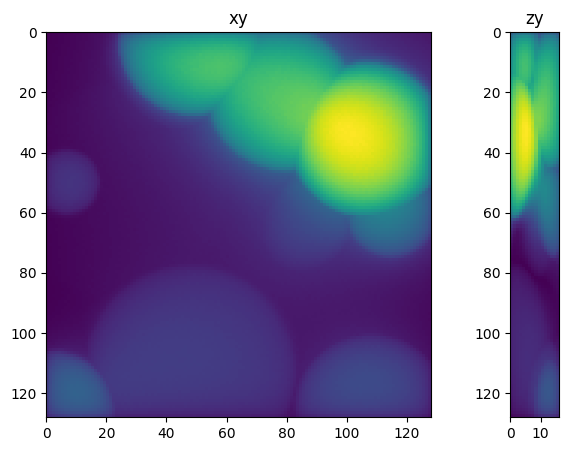

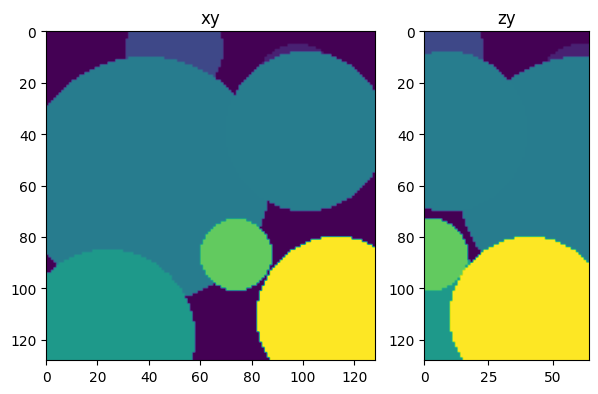

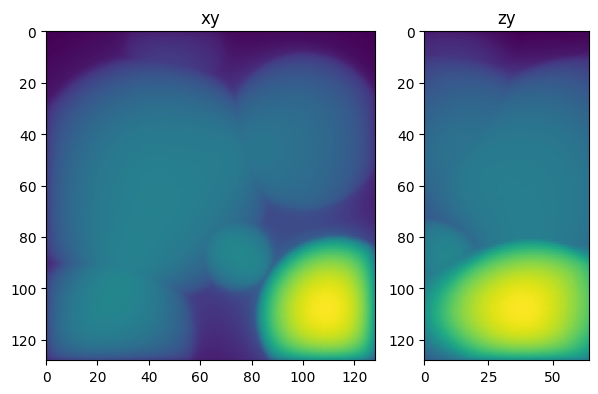

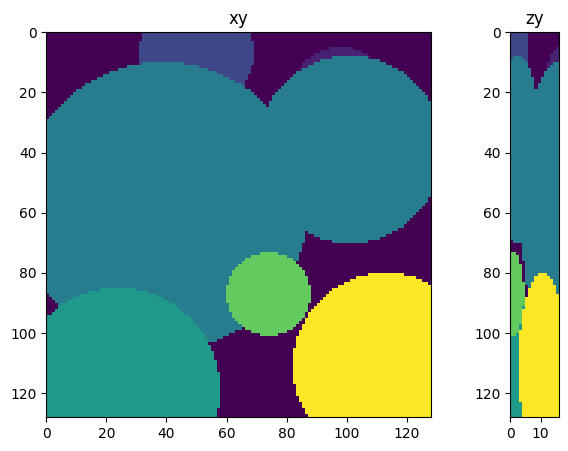

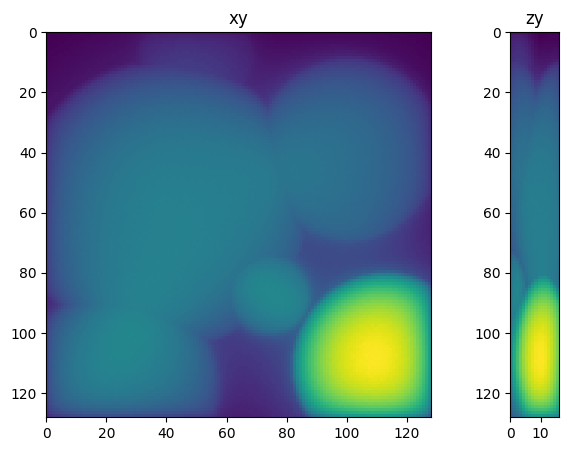

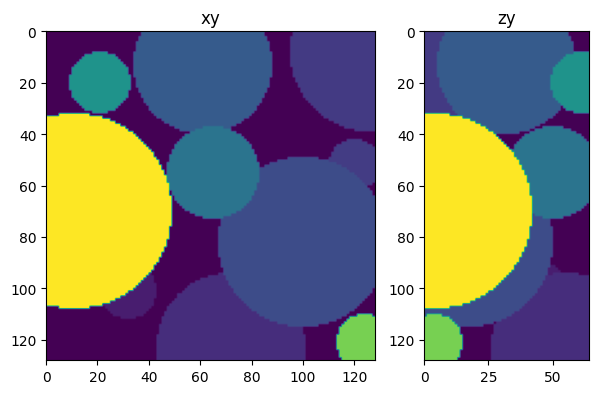

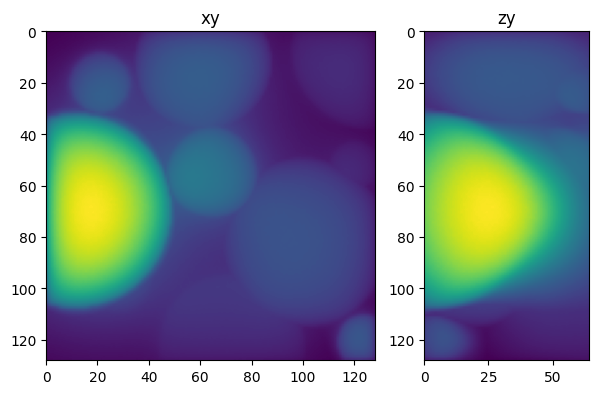

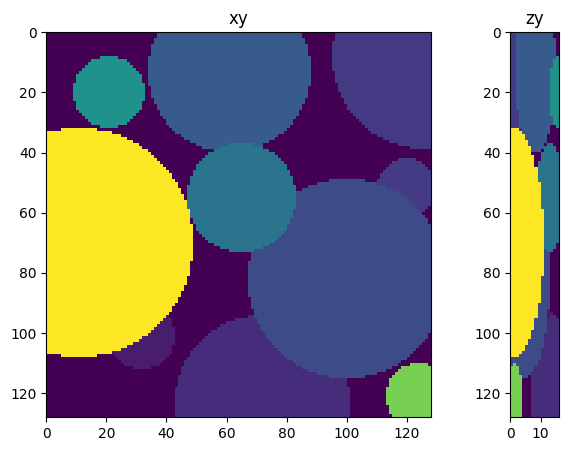

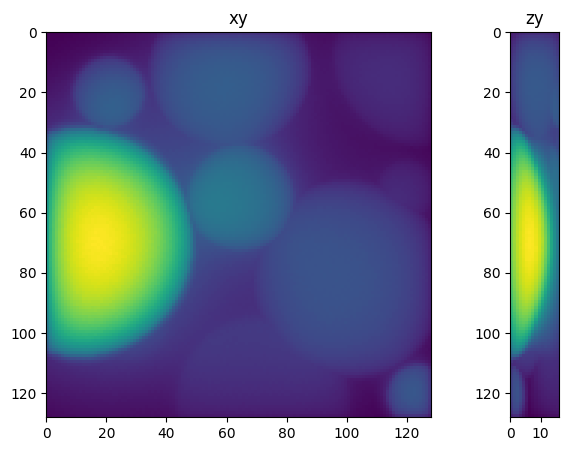

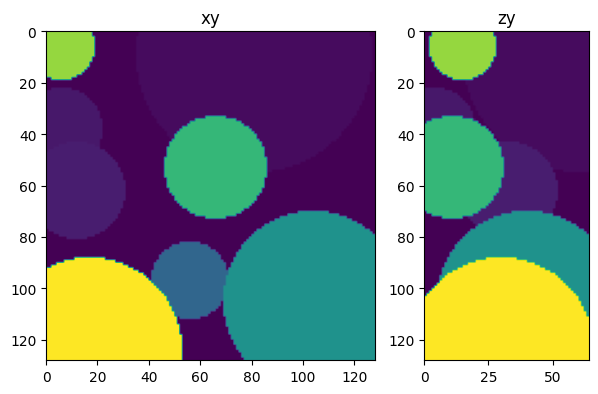

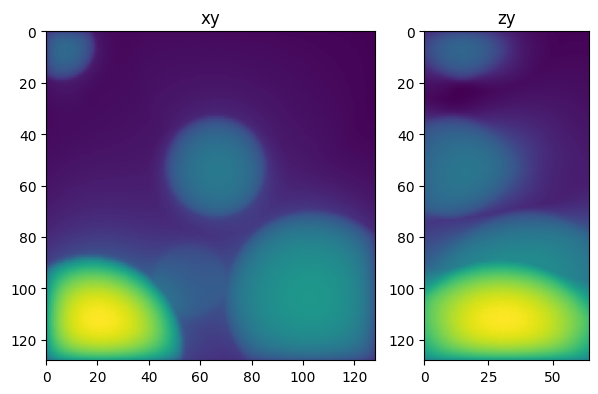

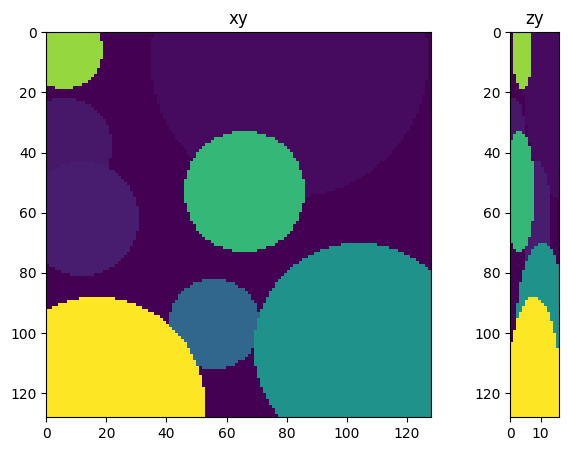

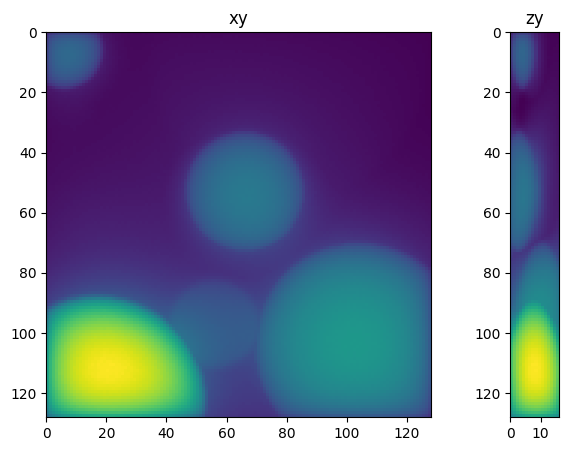

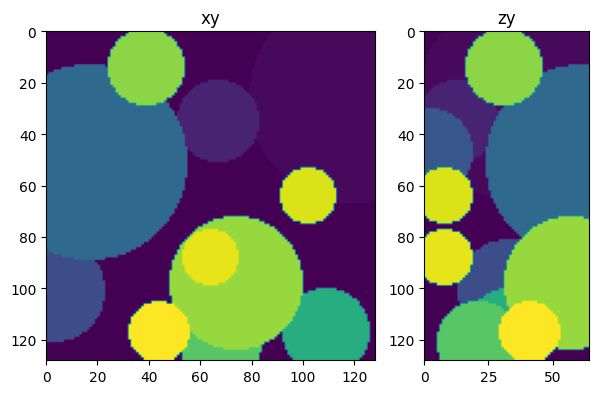

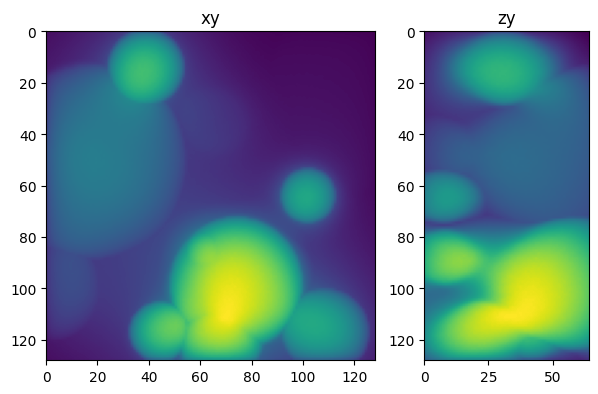

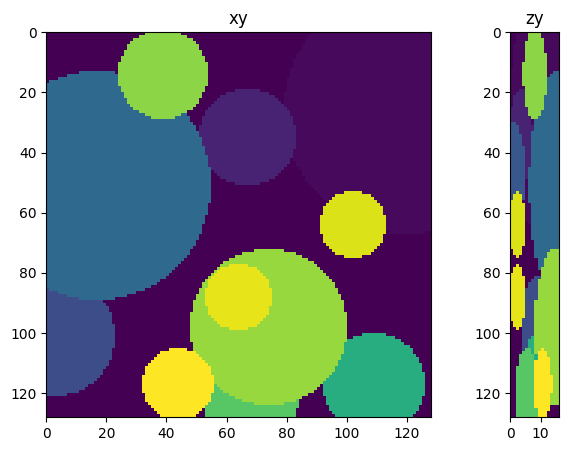

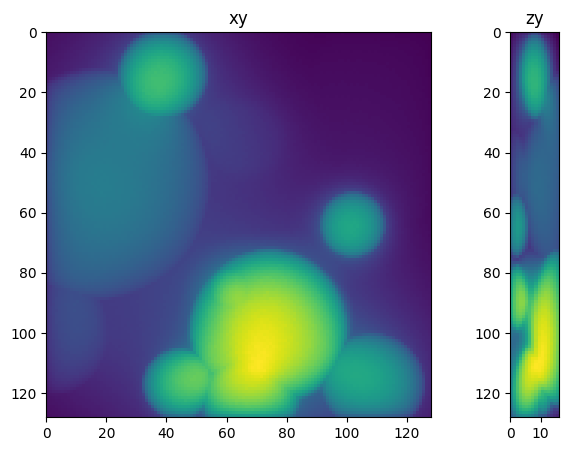

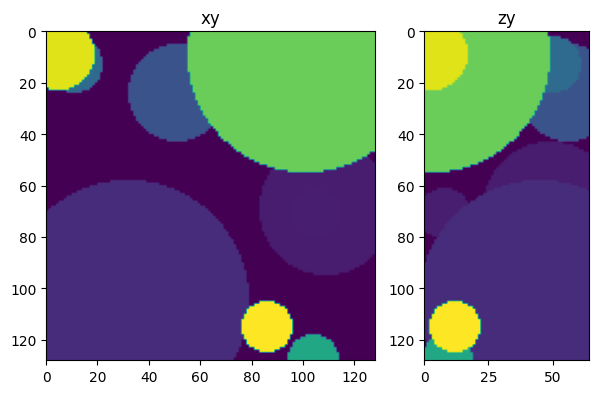

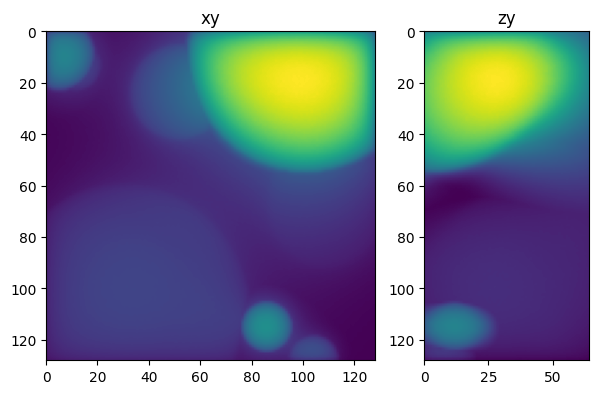

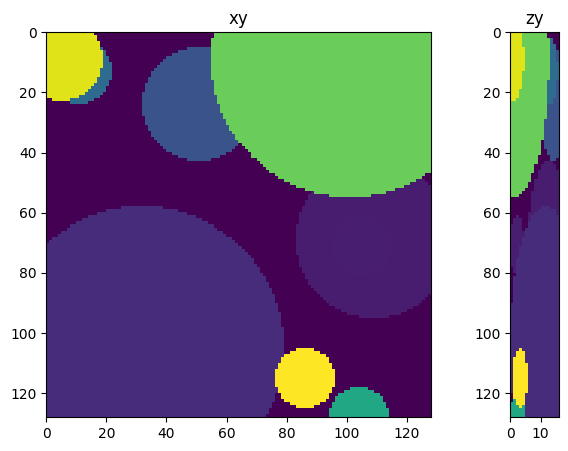

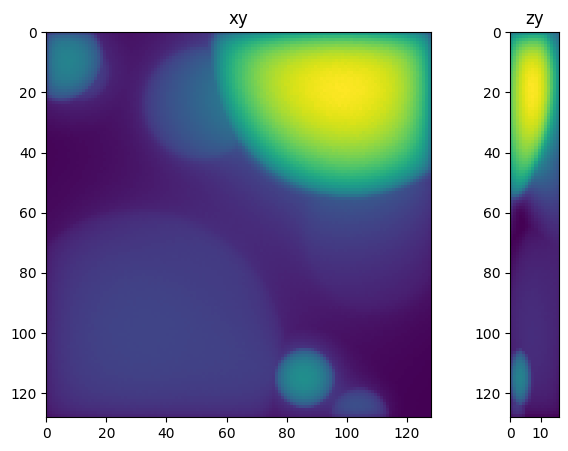

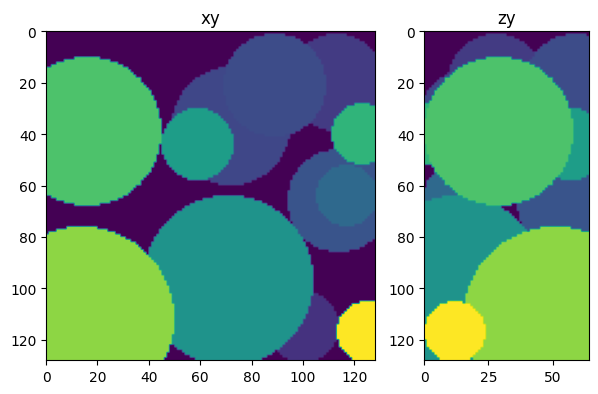

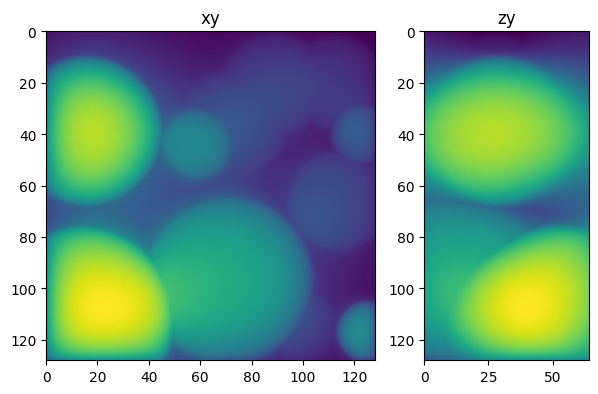

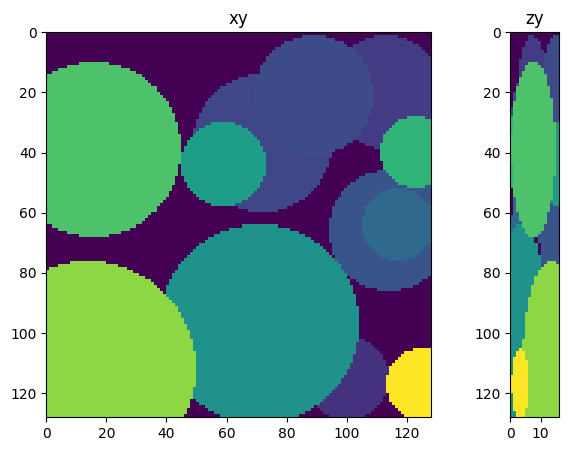

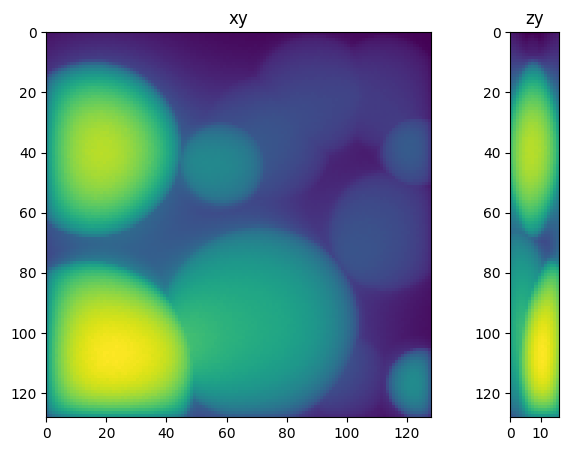

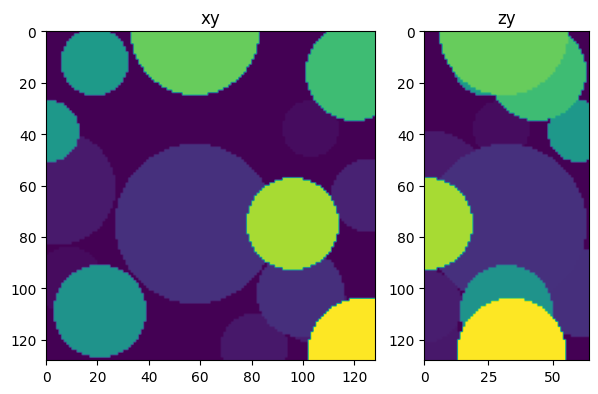

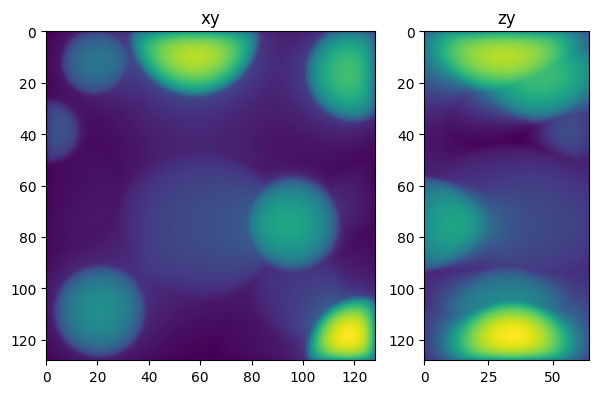

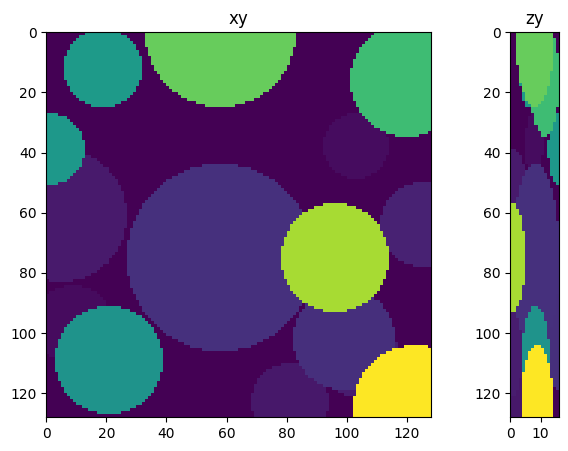

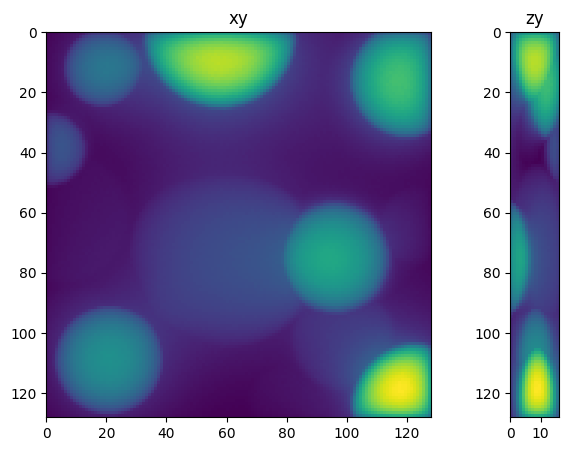

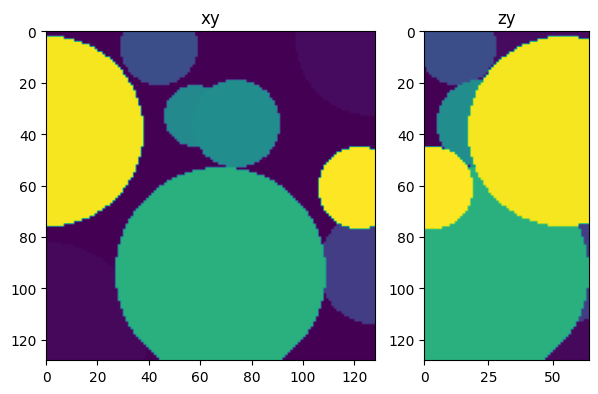

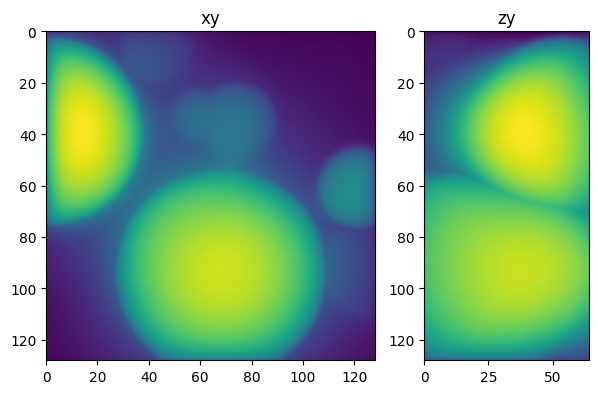

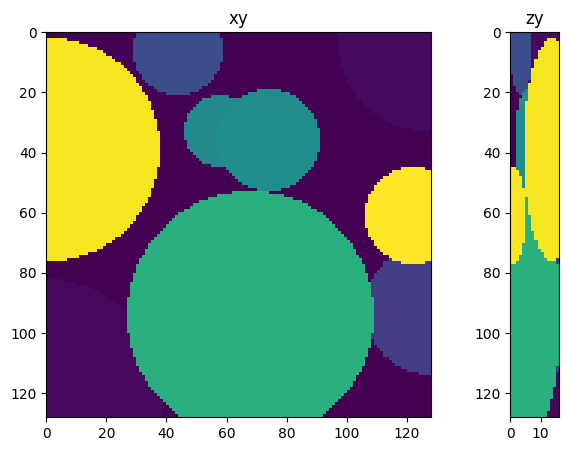

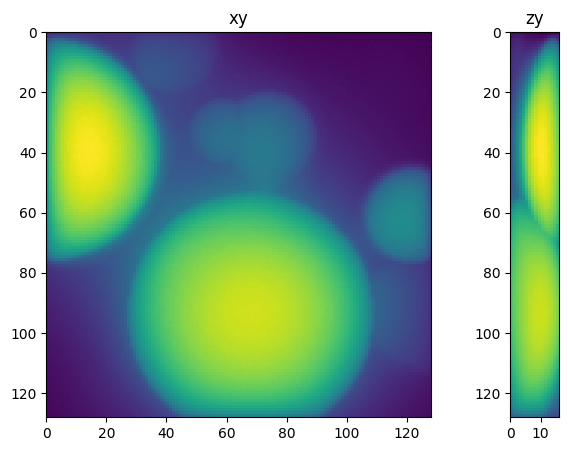

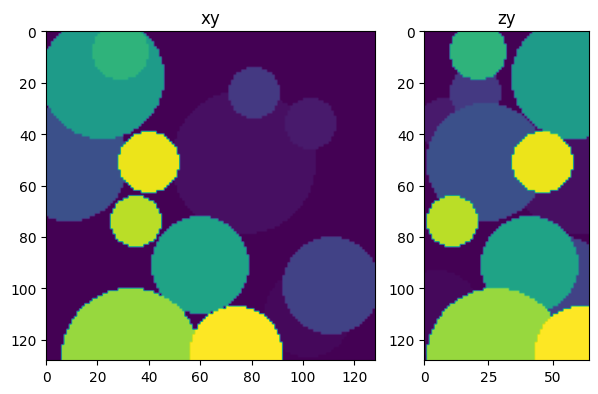

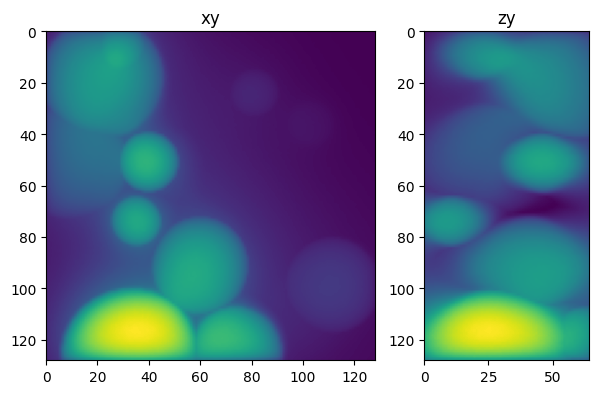

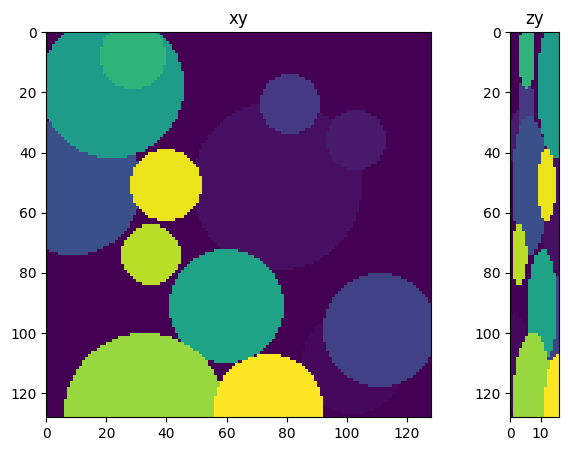

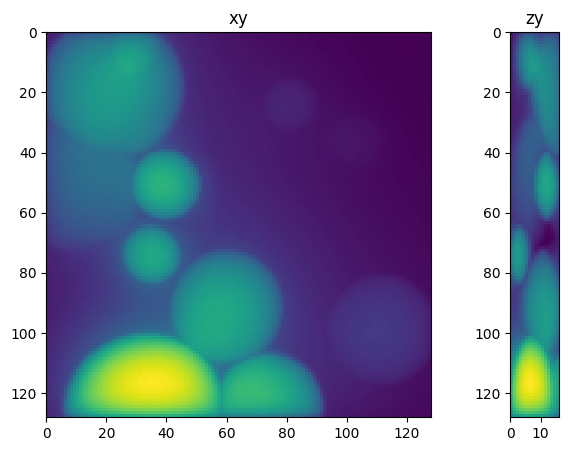

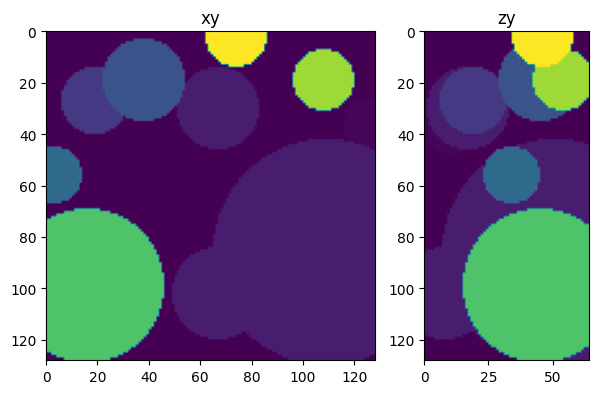

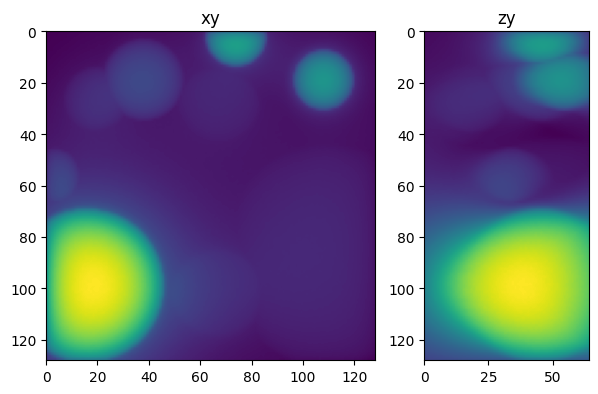

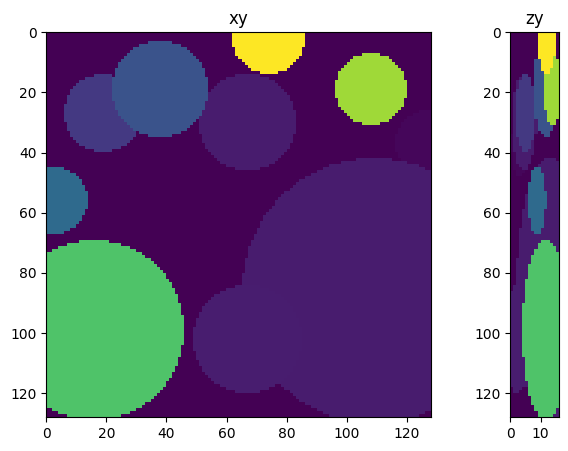

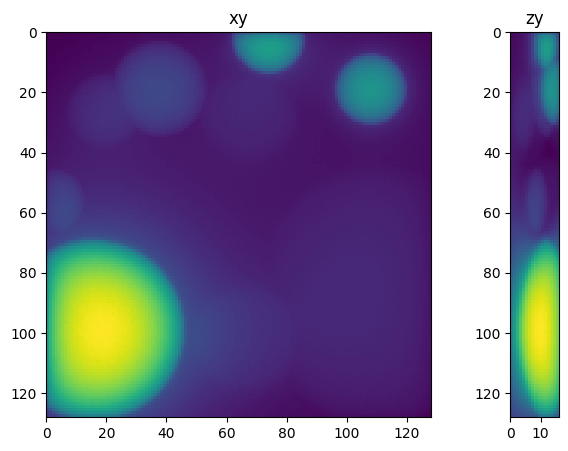

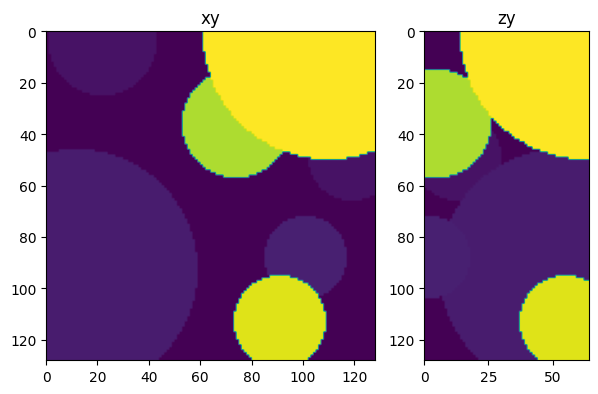

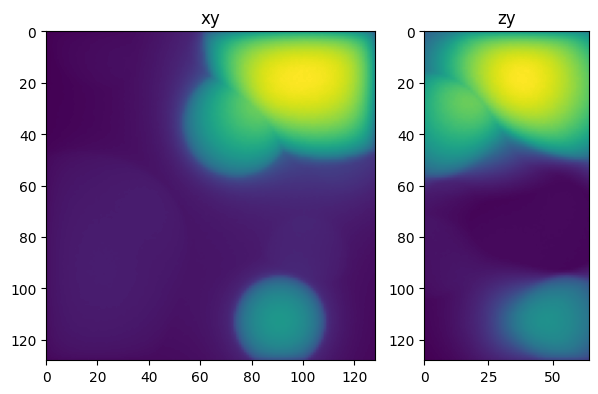

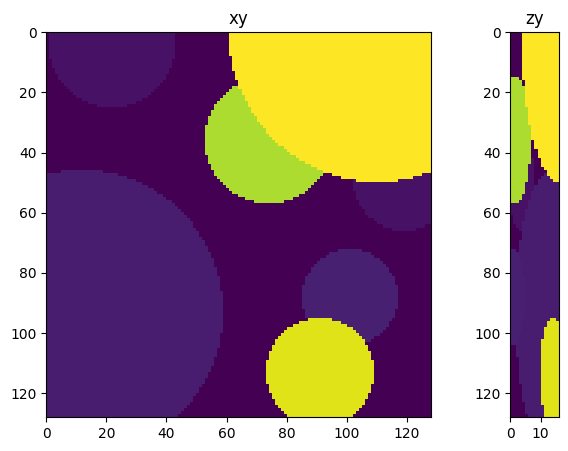

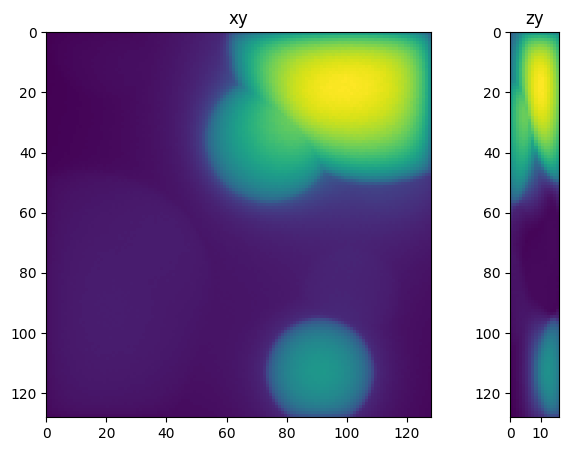

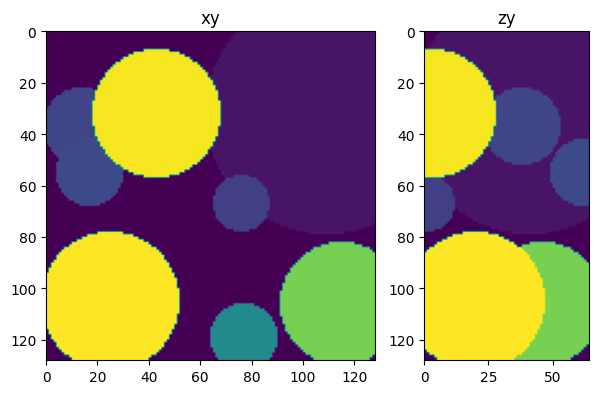

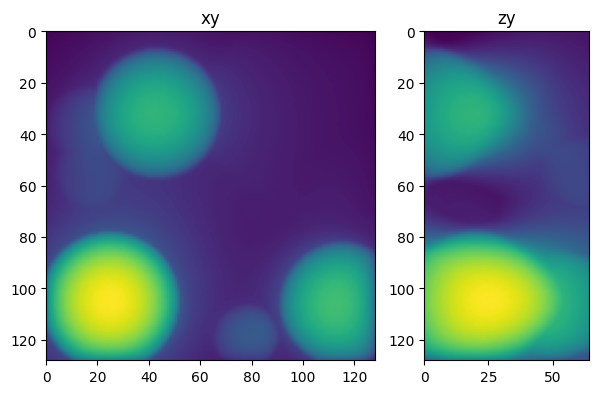

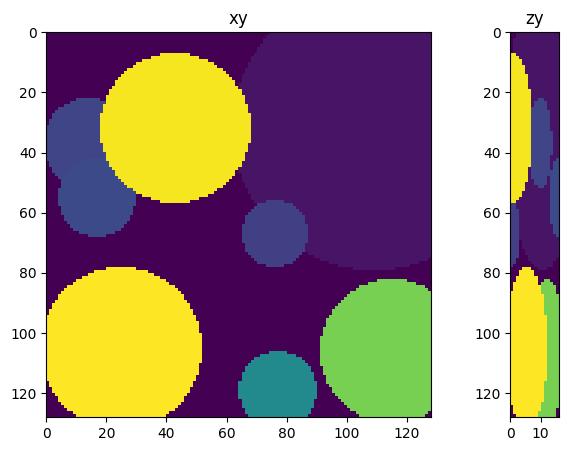

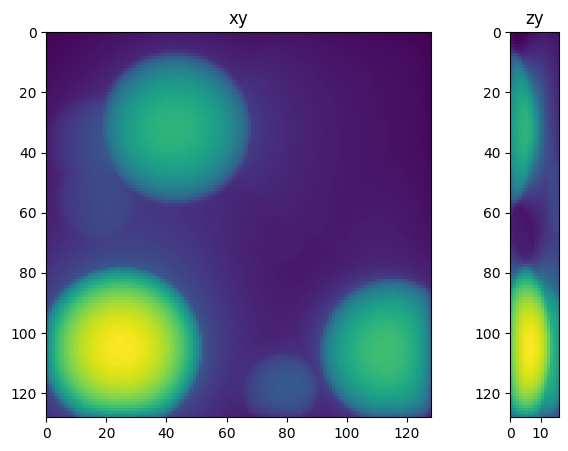

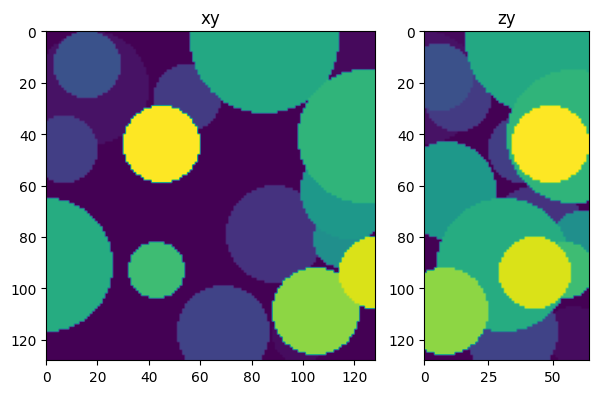

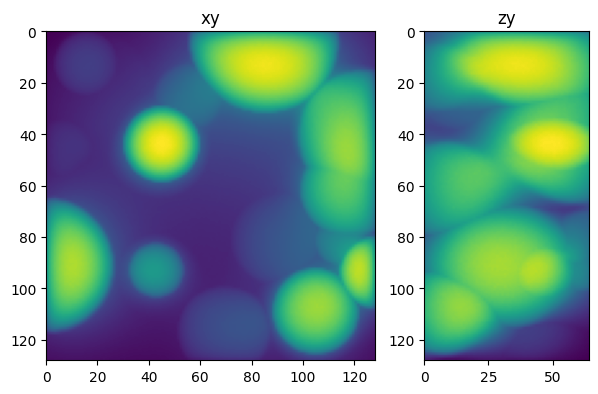

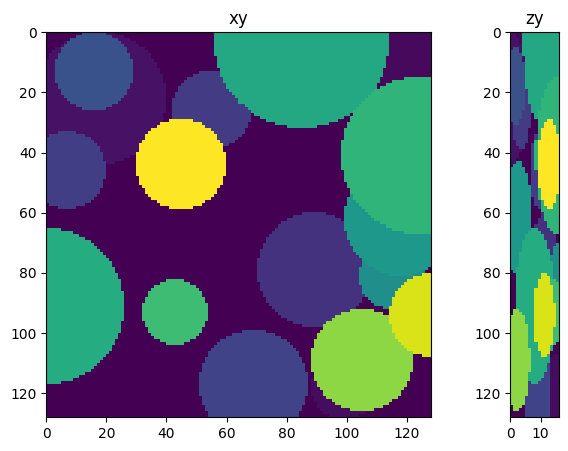

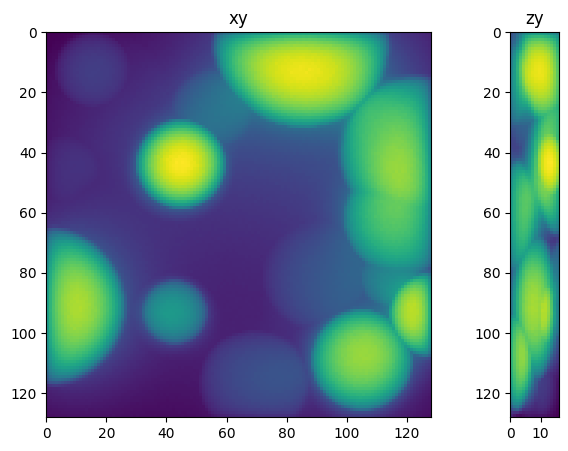

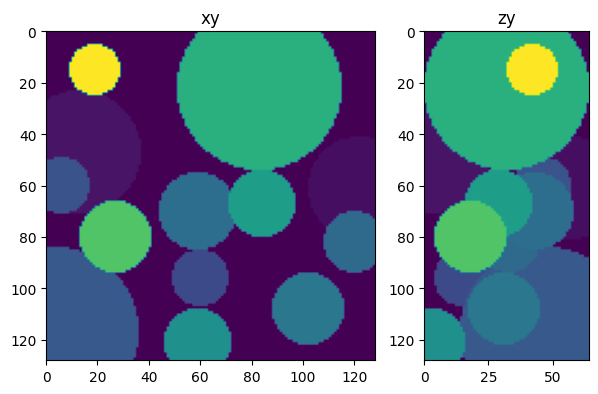

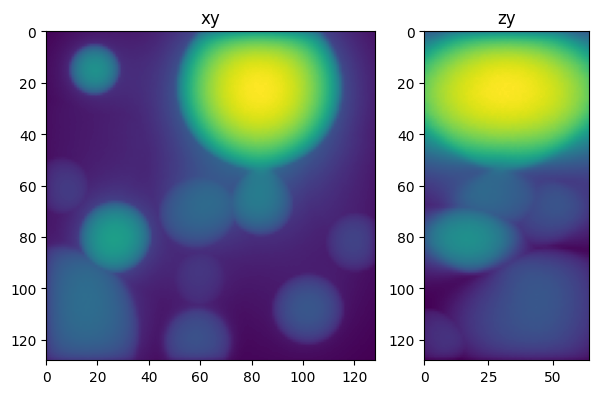

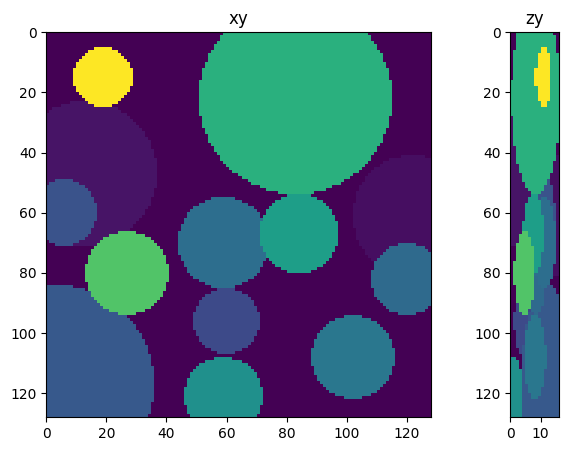

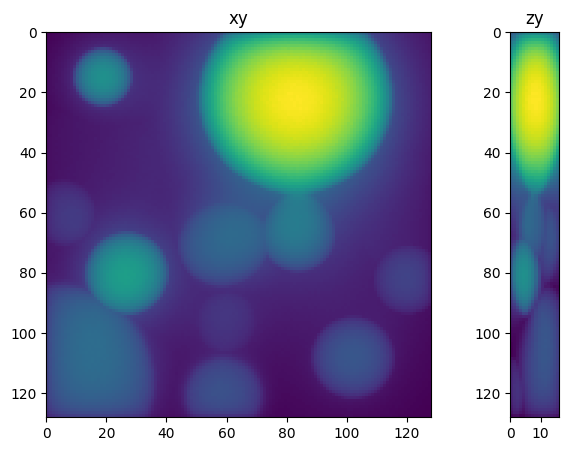

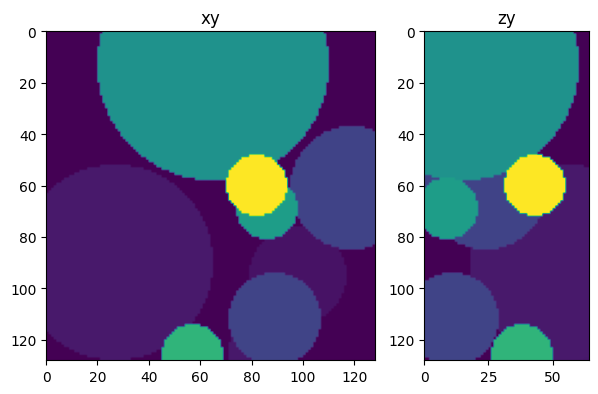

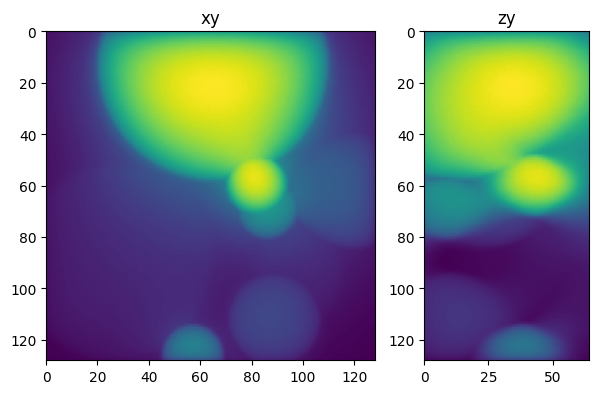

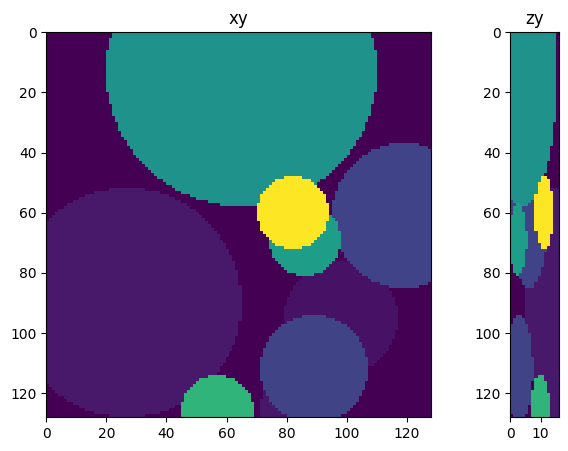

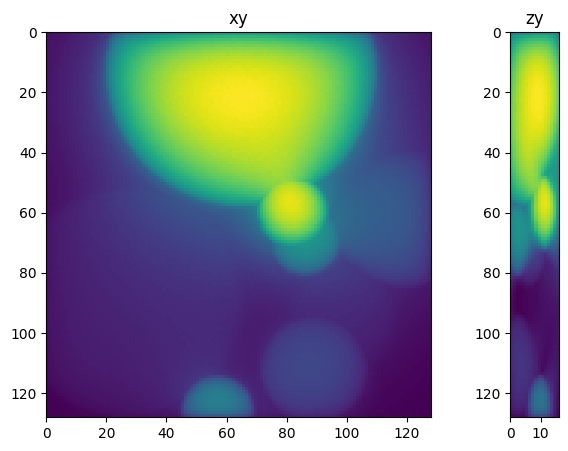

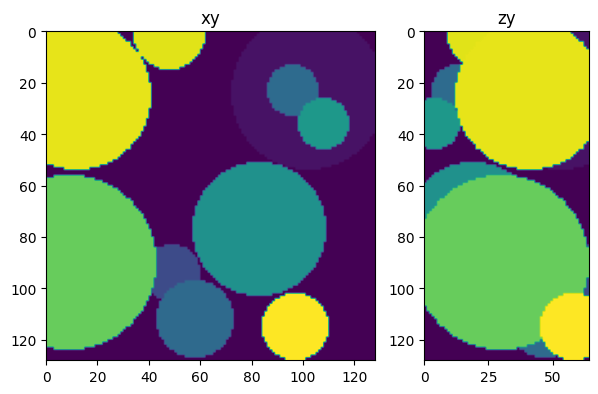

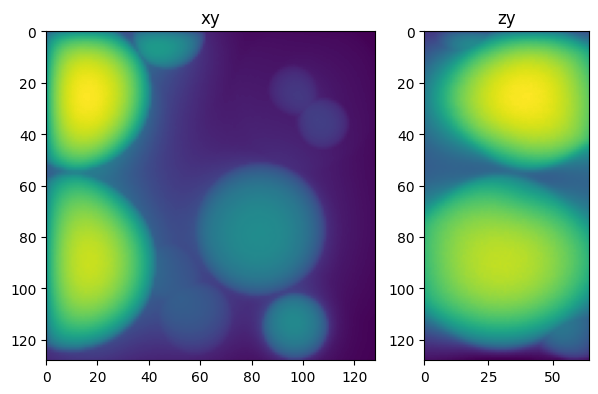

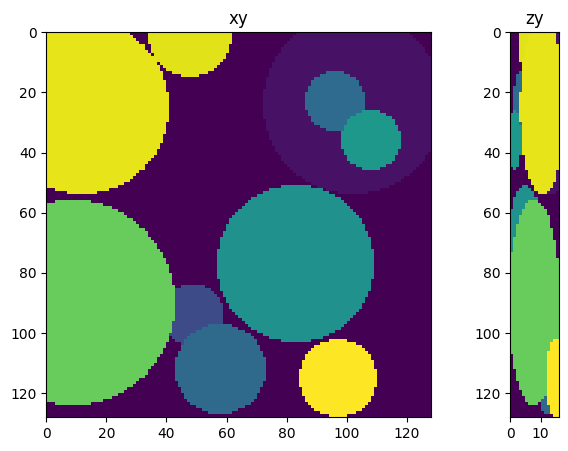

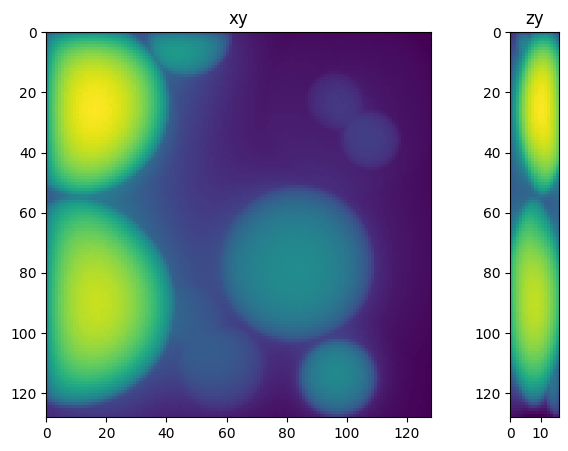

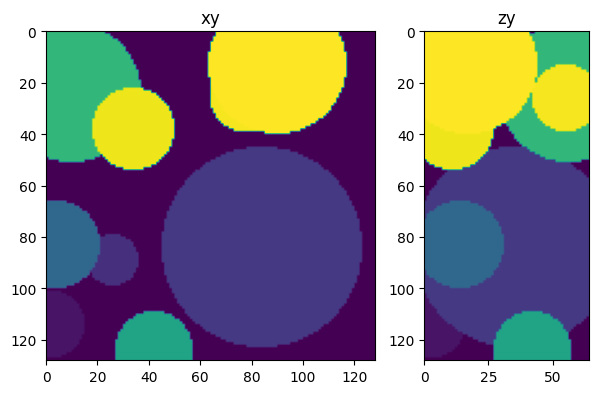

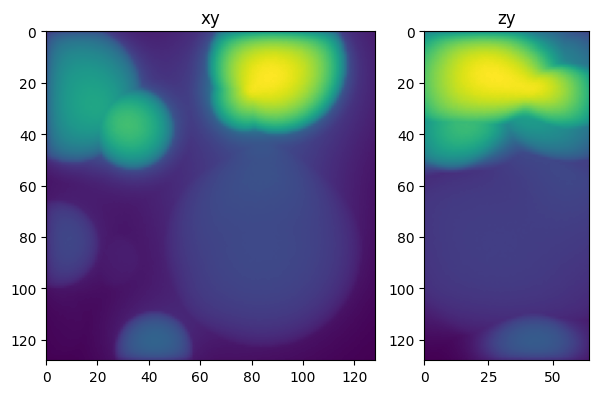

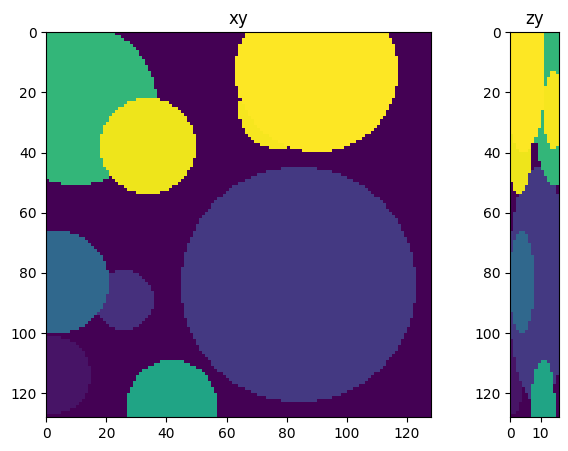

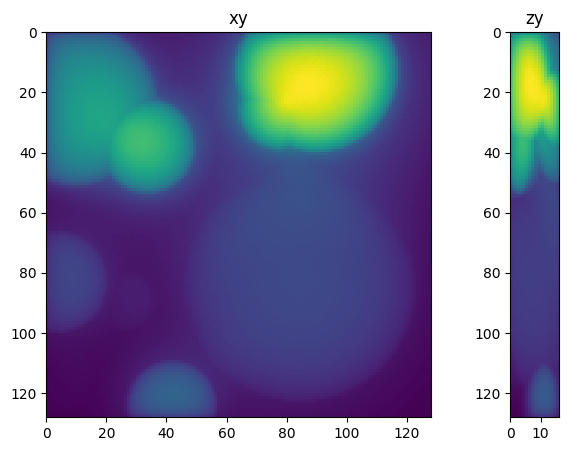

In [8]:

xdim=128
ydim=128
zdim=64

number_images=20
number_spheres=100


for n in range(0,number_images):

    phantom = np.zeros([zdim,xdim,ydim], dtype=np.float32)
    
    for i in range(0,number_spheres):
        x=random.randint(0,xdim)
        y=random.randint(0,ydim)
        z=random.randint(0,zdim)
        intensity = random.randint(100,800) 

        print(x,y,z)

        r=random.randint(10,50)

        size = [2*r, 2*r, 2*r]
        sphere = rg.sphere(size, r).astype(np.float32)
        sphere = sphere*intensity
        #add_sphere3d(phantom, 20, x, y, z, intensity, 2)
        add_small_to_large(phantom, intensity*sphere, x, y, z, True)

    phantom_forward = forward(phantom, psf, 10, True)
    sub_sample = 4 
    phantom_sub = phantom[::sub_sample,:,:]
    phantom_forward_sub = phantom_forward[::sub_sample,:,:]

    fig=show_xy_zy_max(phantom, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward, figsize=(7,5))
    fig = show_xy_zy_max(phantom_sub, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward_sub, figsize=(7,5))

    imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)
    imsave(image_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  field_imaged = poisson(field_imaged.astype(float))


In [53]:
phantom_forward_sub.shape

(86, 256, 256)